In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\source")

import data_manipulation as dm 
import data_visualization as dv
import model_test
import data_processing as dp

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from model_test import Test
import seaborn as sns
import pandas as pd
import plotly as pl

In [3]:
from sklearn.naive_bayes import GaussianNB

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
data = dm.read_data('Synthetic_data.xlsx')
data.drop(['Unnamed: 0'], axis = 1, inplace = True)
data.head()

,BHK_raw_quality_score,median_Freq_speed,mean_d_P,dist_Freq_tilt_x,dist_Freq_speed,median_Freq_tilt_y,Space_Between_Words,bandwidth_tilt_x,std_d_P,mean_Pressure,in_Air,BHK_raw_speed_score,std_Density,median_Freq_tremolo,Age,Dysgraphia
0,21.333333,0.001132,0.096496,0.000225,0.000355,0.003374,1418.925895,0.003258,1.335429,588.924280,0.543732,58.333333,252.647261,0.003335,6,0
1,20.333333,0.001050,0.191805,0.000237,0.000458,0.003336,1524.264209,0.003102,1.758775,460.662390,0.540825,101.333333,181.095889,0.003334,6,0
2,16.000000,0.001310,0.134668,0.000320,0.000210,0.003348,1125.804989,0.003230,1.548513,309.809359,0.642660,159.000000,280.365147,0.003373,8,0
3,29.000000,0.001128,0.179636,0.000300,0.000368,0.003401,1678.745264,0.003318,1.802776,489.141456,0.707339,76.000000,285.035458,0.003320,7,0
4,16.500000,0.001181,0.204028,0.000233,0.000279,0.003370,1317.883933,0.003259,2.334114,380.491356,0.574225,167.500000,219.778932,0.003335,10,0


In [7]:
X = data.drop(['Dysgraphia'], axis = 1)
y = data['Dysgraphia']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, shuffle = True, stratify = y)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
tst = Test(model = GaussianNB(), n_folds = 5)
scores = tst.cross_validation_scores(X_train, y_train)
scores

,Mean,STD
Accuracy,0.945455,0.044536
Recall,0.750000,0.223607
Precision,0.950000,0.100000
F1_Score,0.816667,0.152753


Accuracy: 0.9166666666666666, Recall: 0.5, Precision: 1.0, F1_Score: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        40
           1       1.00      0.50      0.67         8

    accuracy                           0.92        48
   macro avg       0.95      0.75      0.81        48
weighted avg       0.92      0.92      0.90        48



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


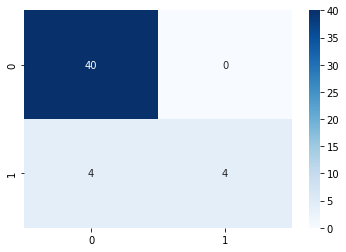

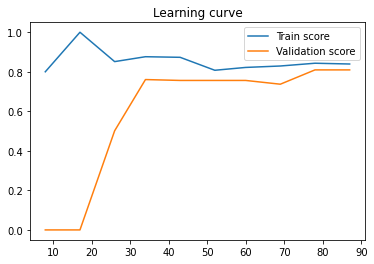

In [11]:
model = tst.train_test_report(X_train, y_train, X_test, y_test)

# Polynomial Features

In [12]:
poly_data = dp.PolynomialFeatures_labeled(X, 2)
poly_data.drop(['Constant Term'], axis = 1, inplace = True)
poly_data.head()

,BHK_raw_quality_score**1,median_Freq_speed**1,mean_d_P**1,dist_Freq_tilt_x**1,dist_Freq_speed**1,median_Freq_tilt_y**1,Space_Between_Words**1,bandwidth_tilt_x**1,std_d_P**1,mean_Pressure**1,...,BHK_raw_speed_score**2,BHK_raw_speed_score**1 x std_Density**1,BHK_raw_speed_score**1 x median_Freq_tremolo**1,BHK_raw_speed_score**1 x Age**1,std_Density**2,std_Density**1 x median_Freq_tremolo**1,std_Density**1 x Age**1,median_Freq_tremolo**2,median_Freq_tremolo**1 x Age**1,Age**2
0,21.333333,0.001132,0.096496,0.000225,0.000355,0.003374,1418.925895,0.003258,1.335429,588.924280,...,3402.777777,14737.756873,0.194546,350.0,63830.638339,0.842596,1515.883564,0.000011,0.020010,36.0
1,20.333333,0.001050,0.191805,0.000237,0.000458,0.003336,1524.264209,0.003102,1.758775,460.662390,...,10268.444438,18351.050110,0.337845,608.0,32795.721121,0.603774,1086.575336,0.000011,0.020004,36.0
2,16.000000,0.001310,0.134668,0.000320,0.000210,0.003348,1125.804989,0.003230,1.548513,309.809359,...,25281.000000,44578.058341,0.536305,1272.0,78604.615540,0.945669,2242.921174,0.000011,0.026984,64.0
3,29.000000,0.001128,0.179636,0.000300,0.000368,0.003401,1678.745264,0.003318,1.802776,489.141456,...,5776.000000,21662.694770,0.252287,532.0,81245.212032,0.946194,1995.248202,0.000011,0.023237,49.0
4,16.500000,0.001181,0.204028,0.000233,0.000279,0.003370,1317.883933,0.003259,2.334114,380.491356,...,28056.250000,36812.971093,0.558644,1675.0,48302.778907,0.733004,2197.789319,0.000011,0.033352,100.0


In [13]:
'Dysgraphia' in poly_data.columns

False

In [14]:
poly_X_train, poly_X_test, poly_y_train, poly_y_test = train_test_split(poly_data, y, test_size = 0.3, random_state = 0, shuffle=True, 
                                                        stratify = y)
poly_scaler = StandardScaler()
poly_X_train = poly_scaler.fit_transform(poly_X_train)
poly_X_test = poly_scaler.transform(poly_X_test)

In [15]:
poly_X_train = pd.DataFrame(poly_X_train, columns = poly_data.columns)
poly_X_test = pd.DataFrame(poly_X_test, columns = poly_data.columns)

In [16]:
new_features = ['Space_Between_Words**1',
 'BHK_raw_quality_score**1 x median_Freq_speed**1',
 'BHK_raw_quality_score**1 x mean_d_P**1',
 'BHK_raw_quality_score**1 x Age**1']

In [17]:
sfs_test = Test(model = GaussianNB(), n_folds = 5)
scores = sfs_test.cross_validation_scores(poly_X_train[new_features], poly_y_train)
scores

,Mean,STD
Accuracy,0.954113,0.028761
Recall,0.900000,0.122474
Precision,0.883333,0.145297
F1_Score,0.874286,0.066639


Accuracy: 0.9583333333333334, Recall: 1.0, Precision: 0.8, F1_Score: 0.888888888888889
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        40
           1       0.80      1.00      0.89         8

    accuracy                           0.96        48
   macro avg       0.90      0.97      0.93        48
weighted avg       0.97      0.96      0.96        48



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


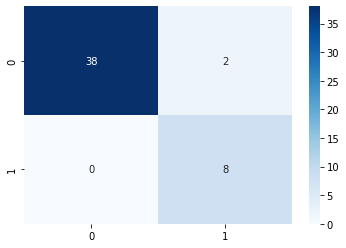

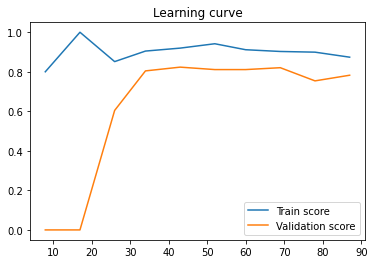

GaussianNB()

In [18]:
sfs_test.train_test_report(poly_X_train[new_features], poly_y_train, poly_X_test[new_features], poly_y_test)